# Load the MNIST dataset

https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Load recorded events list from .pickle file

In [170]:
# Set params value for .pkl file name:

fr_ev_th=16
mnist_sym_start=15000
mnist_sym_end=29999
frame_size = 16
# list_np_fr = [[] for i in range(3)]

In [23]:
import pickle

f_path='mnist_dvs/'
f_name='mnist_'+str(mnist_sym_start)+'_'+str(mnist_sym_end)+'.pkl'
full_path=f_path+f_name
with open(full_path, 'rb') as f:
    events = pickle.load(f)

In [176]:
full_path='mnist_dvs/mnist_15000_29999_6mm_50cm_azel.pkl'
with open(full_path, 'rb') as f:
    events = pickle.load(f)

In [171]:
print(f_name)
print(len(events))
print(len(events[3]))
# print(type(events[0]))

mnist_0_49999_list_np_fr_16_ev_th_8.pkl
15000
3630


# Create a list of numpy frames (with crop) on_off/on/off

15000
5
<class 'numpy.ndarray'>
(16, 16)


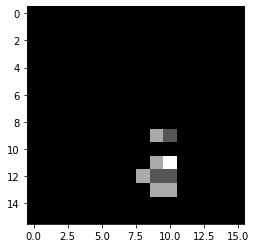

In [177]:
# operational with crop and create a list of 3d numpy arrays = num_of_frames x 2D frame

import matplotlib.pyplot as plt
%matplotlib inline

def to_uint8( data ) :
    # maximum pixel
    latch = np.zeros_like( data )
    latch[:] = 255
    # minimum pixel
    zeros = np.zeros_like( data )

    # unrolled to illustrate steps
    d = np.maximum( zeros, data )
    d = np.minimum( latch, d )

    # cast to uint8
    return np.asarray( d, dtype="uint8" )

# num_of_mnist_symbols=6000
original_frame_size=32

# ----------Input parameters:--------
max_num_of_frames=100
# max_num_of_frames=10
frame_size=16
# -----------------------------------

crop_x_min=(original_frame_size-frame_size)//2+1+(original_frame_size-frame_size)%2
crop_x_max=original_frame_size-((original_frame_size-frame_size)//2+1)
crop_y_min=crop_x_min
crop_y_max=crop_x_max

list_np_fr_arr_on_off = []
list_np_fr_arr_on = []
list_np_fr_arr_off = []
# fr_ev_th=8
for mnist_sym in events:
    np_fr_arr_on_off=np.zeros((max_num_of_frames,frame_size,frame_size))
    np_fr_arr_on=np.zeros((max_num_of_frames,frame_size,frame_size))
    np_fr_arr_off=np.zeros((max_num_of_frames,frame_size,frame_size))
#     ev_cnt=[0,0,0]
#     fr_num=[0,0,0]
    ev_cnt=0
    fr_num=0
    for e in mnist_sym:
        x=e[1]-crop_x_min
        y=e[2]-crop_y_min
        if e[1]>=crop_x_min and e[1]<=crop_x_max and e[2]>=crop_y_min and e[2]<=crop_y_max:
#             np_fr_arr_on_off[fr_num[0], (frame_size-1)-y,x]=np_fr_arr_on_off[fr_num[0], (frame_size-1)-y,x]+1
            np_fr_arr_on_off[fr_num, (frame_size-1)-y,x]=np_fr_arr_on_off[fr_num, (frame_size-1)-y,x]+1
            if e[3]==1:
#                 if ev_cnt[1]>=fr_ev_th-1 and fr_num[1]<max_num_of_frames-1:
#                     fr_num[1]+=1
#                     ev_cnt[1]=0
#                 else:
#                     ev_cnt[1]+=1
#                 np_fr_arr_on[fr_num[1], (frame_size-1)-y,x]=np_fr_arr_on[fr_num[1], (frame_size-1)-y,x]+1
                np_fr_arr_on[fr_num, (frame_size-1)-y,x]=np_fr_arr_on[fr_num, (frame_size-1)-y,x]+1
            else:
#                 if ev_cnt[2]>=fr_ev_th-1 and fr_num[2]<max_num_of_frames-1:
#                     fr_num[2]+=1
#                     ev_cnt[2]=0
#                 else:
#                     ev_cnt[2]+=1
#                 np_fr_arr_off[fr_num[2], (frame_size-1)-y,x]=np_fr_arr_off[fr_num[2], (frame_size-1)-y,x]+1
                np_fr_arr_off[fr_num, (frame_size-1)-y,x]=np_fr_arr_off[fr_num, (frame_size-1)-y,x]+1

#             if ev_cnt[0]>=fr_ev_th-1 and fr_num[0]<max_num_of_frames-1:
#                 fr_num[0]+=1
#                 ev_cnt[0]=0
#             else:
#                 ev_cnt[0]+=1
            if ev_cnt>=fr_ev_th-1 and fr_num<max_num_of_frames-1:
                fr_num+=1
                ev_cnt=0
            else:
                ev_cnt+=1
    
#     fr_num[0] += 1
#     fr_num[1] += 1
#     fr_num[2] += 1
    fr_num += 1
    
#     list_np_fr_arr_on_off.append(np_fr_arr_on_off[:fr_num[0],:,:])
#     list_np_fr_arr_on.append(np_fr_arr_on[:fr_num[1],:,:])
#     list_np_fr_arr_off.append(np_fr_arr_off[:fr_num[2],:,:])
    list_np_fr_arr_on_off.append(np_fr_arr_on_off[:fr_num,:,:]/fr_ev_th)
    list_np_fr_arr_on.append(np_fr_arr_on[:fr_num,:,:]/fr_ev_th)
    list_np_fr_arr_off.append(np_fr_arr_off[:fr_num,:,:]/fr_ev_th)


list_np_fr_6000=[list_np_fr_arr_on_off,list_np_fr_arr_on,list_np_fr_arr_off]

# -----Testing parameters:----------    
frame_sample = 0
mnist_sym_relative_ind=0
# ----------------------------------

print(len(list_np_fr_arr_on_off))
print(y_train[mnist_sym_relative_ind])
print(type(list_np_fr_arr_on_off[mnist_sym_relative_ind][frame_sample,:,:]))
print(list_np_fr_arr_on_off[mnist_sym_relative_ind][frame_sample,:,:].shape)
image = list_np_fr_arr_on_off[mnist_sym_relative_ind][frame_sample,:,:]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

# Load and plot frame samples from the list of 6000 mnist symbol event frames

In [ ]:
# mnist_sym_start=12000
frame_sample = 2
mnist_sym_relative_ind=2000
print(len(list_np_fr_arr_on_off))
print(y_train[mnist_sym_start+mnist_sym_relative_ind])
print(type(list_np_fr_arr_on[mnist_sym_relative_ind]))
print(list_np_fr_arr_on[mnist_sym_relative_ind].shape)
for frame_sample in range(list_np_fr_arr_on[mnist_sym_relative_ind].shape[0]):
    image = list_np_fr_arr_on[mnist_sym_relative_ind][frame_sample,:,:]
    # plot the sample
    fig = plt.figure
    plt.imshow(image, cmap='gray')
    plt.show()
    print(np.sum(image))

# Save recorded events numpy frame lists to .pickle file

In [60]:
import pickle

# list_np_fr=[list_np_fr_arr_on_off,list_np_fr_arr_on,list_np_fr_arr_off]
f_path='mnist_dvs/'
f_name='mnist_'+str(mnist_sym_start)+'_'+str(mnist_sym_end)+'_list_np_fr_'+str(frame_size)+'_ev_th_'+str(fr_ev_th)+'.pkl'
full_path=f_path+f_name

print(full_path)
with open(full_path, 'wb') as f:
    pickle.dump(list_np_fr, f)

mnist_dvs/mnist_0_49999_list_np_fr_16_ev_th_1000.pkl


In [ ]:
# list_np_fr_6000=[list_np_fr_arr_on_off,list_np_fr_arr_on,list_np_fr_arr_off]

# Load recorded events list from .pickle file

In [ ]:
import pickle

mnist_start = 12000
mnist_end = 17999

f_path='./'
f_name='mnist_'+str(mnist_start)+'_'+str(mnist_end)+'_list_np_fr_'+str(frame_size)+'_ev_th_'+str(fr_ev_th)+'.pkl'
full_path=f_path+f_name
with open(full_path, 'rb') as f:
    list_np_fr_6000 = pickle.load(f)
    
    

In [ ]:
list_np_fr_6000[0][869]

In [173]:
list_np_fr = [[] for i in range(3)]

mnist_sym_start=0
mnist_sym_end=29999

In [178]:
for i in range(3):
    for frames in list_np_fr_6000[i]:
        list_np_fr[i].append(frames)


In [179]:
len(list_np_fr[0])

30000

In [ ]:
f_path='mnist_dvs/'
f_name='mnist_'+str(mnist_sym_start)+'_'+str(mnist_sym_end)+'_list_np_fr_'+str(frame_size)+'_ev_th_'+str(fr_ev_th)+'.pkl'
full_path=f_path+f_name

print(full_path)
with open(full_path, 'wb') as f:
    pickle.dump(list_np_fr, f)
    
len(list_np_fr[0])

# Load and plot frame samples from the list of 6000 mnist symbol event frames

0


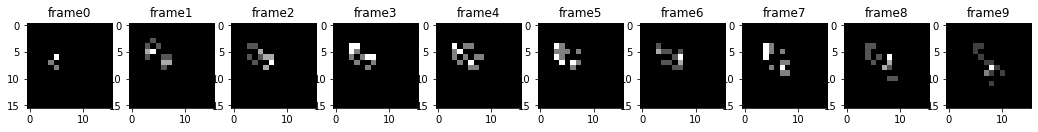

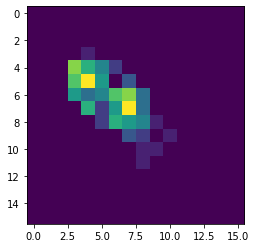

In [180]:
frame_sample = 2
mnist_sym_relative_ind=1
on_off = 0# 0-both,1-on,2-off
print(y_train[mnist_sym_start+mnist_sym_relative_ind])
# print(len(list_np_fr[1]))

frames_n = list_np_fr[on_off][mnist_sym_relative_ind].shape[0]
frames_n=10
fig, axs = plt.subplots(1, frames_n, figsize=(18,6))
image_sum = np.zeros(list_np_fr[on_off][mnist_sym_relative_ind][0,:,:].shape)


for frame_sample in range(frames_n):
    image = list_np_fr[on_off][mnist_sym_relative_ind][-frame_sample-1,:,:] # list_np_fr_arr_on on events only
    image = np.squeeze(image)
    if frames_n>1:
        axs[frame_sample].imshow(image, cmap='gray')
        axs[frame_sample].set_title('frame'+str(frame_sample))
    else:
        axs.imshow(image, cmap='gray')
        axs.set_title('frame'+str(frame_sample))
    image_sum += image
# plt.savefig('frames_image10004.png')

plt.figure()
plt.imshow(image_sum)
# plt.savefig('image_sum7.png')


In [133]:
list_np_fr[on_off][mnist_sym_relative_ind].shape[0]

100

In [150]:
#  generate single matrix with all events
on_off = 0

list_allevents = []
list_eventsum = []
for indx, mnist_sample in enumerate(list_np_fr[on_off]):
    image_sum = np.zeros(mnist_sample[0,:,:].shape)
    for frame in mnist_sample:
        image_sum += frame
        
    list_allevents.append(image_sum[np.newaxis,:,:])
    list_eventsum.append(np.sum(image_sum))

print(len(list_allevents))

30000


In [53]:
def dvs_generate_fr_dataset(list_np_fr, on_off = 0, ts = 6):

    shuffel_frames = 0# 0-no shuffle, 1-random shuffel, 2-fixed shuffel
    shuffled_order = []
    if shuffel_frames==2:
        shuffled_order = np.random.permutation(range(0, ts))
    
    traj = np.zeros([ts,2])
    missing_frames_count = 0
    
    dvs_images = []
    trajectories = []
    no_frames_count = 0
    for ind, samples in enumerate(list_np_fr):
        dimim = np.zeros([ts, frame_size, frame_size, 1])
        frames = np.min([ts,samples.shape[0]])#last frame contains less than 'th' events
       
        if frames > 0:
            if shuffel_frames==0:
                dimim[-frames:,:,:,0] = samples[:frames,:,:]
            elif shuffel_frames==1:
                #shuffel frames
                frames_perm = np.random.permutation(range(0, frames))
                dimim[-frames:,:,:,0] = samples[frames_perm,:,:]    
            else: #shuffel_frames==2
                dimim[-frames:,:,:,0] = samples[:frames,:,:]
                dimim[:,:,:,0] = dimim[shuffled_order,:,:,0]
        else:
            no_frames_count += 1
#         if samples.shape[0] < ts:
#             missing_frames_count += 1
        
        dvs_images.append(dimim)
        trajectories.append(traj)
        
    # dvs_images = np.array(dvs_images)[:,:,:,:, np.newaxis]
    dvs_images = np.array(dvs_images)[:,:,:,:]
    trajectories = np.array(trajectories)
    x_dvs = (dvs_images, trajectories)
    
    print("empty input count: ", no_frames_count)
    return x_dvs

def dvs_generate_onoff_lasagna(ds1, ds2):
    ds_onoff = [[],[]]
#     print(ds1[0].shape)
#     ds_onoff[0] = np.stack((ds1[0].squeeze(),ds2[0].squeeze()),axis=4)
    ds_onoff[0] = np.stack((ds1[0],ds2[0]),axis=4)
    print(ds_onoff[0].shape)
    ds_onoff[0] = ds_onoff[0][:,:,:,:,:,0]
    ds_onoff[1] = ds1[1]

    return ds_onoff
#     test_x_dvs_onoff = [[],[]]
#     test_x_dvs_onoff[0] = np.stack((test_x_dvs[0].squeeze(),test_x_dvs_[0].squeeze()),axis=4)
#     # test_x_dvs_onoff[0] = np.stack((test_x_dvs[0].squeeze(),test_x_dvs_[0].squeeze()))
#     test_x_dvs_onoff[1] = test_x_dvs[1]

def dvs_generate_ds(list_np_fr, on_off = 0, ts = 6, mnist_indx = [0,10000], sym_used = [0,10000], n_val = 1000, lasgna = True):
# on_off = 1# 0-both,1-on,2-off,3-on,off
# ts = 3
# first_mnist_indx = 0 # absolute- relative to mnist dataset
# last_mnist_indx = 49999

# used_sym_start = 5000 # relative- samples to use to build dataset
# used_sym_end = 49999
#     val_n = 4000

    y_train_aligned = y_train[mnist_indx[0]:mnist_indx[1]]
    rand_perm = np.random.permutation(range(sym_used[0], sym_used[1]))
    train_ind = rand_perm[0:-n_val]
    test_ind = rand_perm[-n_val:]

    #train data
    list_fr_train = [list_np_fr[on_off[0]][i] for i in train_ind]
    train_x_dvs = dvs_generate_fr_dataset(list_fr_train, on_off[0], ts)
    train_y_dvs = y_train_aligned[train_ind]

    #test data
    list_fr_test = [list_np_fr[on_off[0]][i] for i in test_ind]
    test_x_dvs = dvs_generate_fr_dataset(list_fr_test, on_off[0], ts)
    test_y_dvs = y_train_aligned[test_ind]

    if lasgna:
       #second data set
#        on_off = 2 # 0-both,1-on,2-off,3-on,off
       #train data
        list_fr_train = [list_np_fr[on_off[1]][i] for i in train_ind]
        train_x_dvs_ = dvs_generate_fr_dataset(list_fr_train, on_off[1], ts)
       #test data
        list_fr_test = [list_np_fr[on_off[1]][i] for i in test_ind]
        test_x_dvs_ = dvs_generate_fr_dataset(list_fr_test, on_off[1], ts)
        
        train_x_dvs = dvs_generate_onoff_lasagna(train_x_dvs, train_x_dvs_)
        test_x_dvs = dvs_generate_onoff_lasagna(test_x_dvs, test_x_dvs_)

    return train_x_dvs, train_y_dvs, test_x_dvs, test_y_dvs


In [ ]:
# train_x_dvs_onoff = [[],[]]
# train_x_dvs_onoff[0] = np.stack((train_x_dvs[0].squeeze(),train_x_dvs_[0].squeeze()),axis=4)
# # train_x_dvs_onoff[0] = np.stack((train_x_dvs[0].squeeze(),train_x_dvs_[0].squeeze()))
# train_x_dvs_onoff[1] = train_x_dvs[1]

# test_x_dvs_onoff = [[],[]]
# test_x_dvs_onoff[0] = np.stack((test_x_dvs[0].squeeze(),test_x_dvs_[0].squeeze()),axis=4)
# # test_x_dvs_onoff[0] = np.stack((test_x_dvs[0].squeeze(),test_x_dvs_[0].squeeze()))
# test_x_dvs_onoff[1] = test_x_dvs[1]


In [89]:
import pickle

fr_ev_th = 8
frame_size = 16
mnist_start = 0
mnist_end = 49999

f_path='./mnist_dvs/'
f_name='mnist_'+str(mnist_start)+'_'+str(mnist_end)+'_list_np_fr_'+str(frame_size)+'_ev_th_'+str(fr_ev_th)+'.pkl'
full_path=f_path+f_name
with open(full_path, 'rb') as f:
    list_np_fr = pickle.load(f)

In [ ]:
print(f_name)

In [ ]:
# import keras_networks
import importlib
importlib.reload(keras_networks)

ts = 10
# mnist_indx = [0,49999]
# sym_used = [5000,49999]
# n_val = 4000
# mnist_indx = [7900,19999]
# sym_used = [0,12099]
# n_val = 1000
mnist_indx = [0,29999]
sym_used = [0,29999]
n_val = 3000

frame_size = 16
lasgna = True
inp_dim = []
on_off = []
if lasgna:
    inp_dim = 2
    on_off = [1,2]
else:
    inp_dim = 1
    on_off = [0]
    
epochs = 100
runs = 1
val_accuracy_arr = np.zeros(runs)
for i in range(0,runs):
    train_x_dvs, train_y_dvs, test_x_dvs, test_y_dvs = dvs_generate_ds(list_np_fr, on_off, 
                                                                  ts, mnist_indx, sym_used, 
                                                                  n_val, lasgna)
    
    rnn102 = keras_networks.rnn_model_102(n_timesteps=ts,
                                      lr=1e-3,dropout=0.0,
                                      ignore_input_B = True,
                                      rnn_type='gru',
                                      rnn_layers = 1,
                                      input_size=(frame_size, frame_size, inp_dim),
                                      conv_fe=False,
                                      rnn_units = 100)

    print("Fit model on training data, run ",i)
    history = rnn102.fit(
            train_x_dvs,
            train_y_dvs,
            batch_size=128,
            epochs=epochs,
            # We pass some validation for
            # monitoring validation loss and metrics
            # at the end of each epoch
            validation_data=(test_x_dvs, test_y_dvs)) #

    val_accuracy_arr[i] = history.history['val_sparse_categorical_accuracy'][-1:][0]

#     train_y_dvs = np.transpose(np.tile(train_y_dvs,(5,1)))
#     test_y_dvs = np.transpose(np.tile(test_y_dvs,(5,1)))
#     rnn102e = keras_networks.rnn_model_102e(n_timesteps=ts,
#                                       lr=1e-3,dropout=0.0,
#                                       ignore_input_B = True,
#                                       rnn_type='gru',
#                                       rnn_layers = 1,
#                                       input_size=(frame_size, frame_size, inp_dim),
#                                       conv_fe=False)
                                
#     print("Fit model on training data, run ",i)
#     history = rnn102e.fit(
#             train_x_dvs,
#             train_y_dvs,
#             batch_size=128,
#             epochs=epochs,
#             # We pass some validation for
#             # monitoring validation loss and metrics
#             # at the end of each epoch
#             validation_data=(test_x_dvs, test_y_dvs)) #
    
#     val_accuracy_arr[i] = history.history['val_time_distributed_accuracy_last_step'][-1:][0]

In [ ]:
# print(np.mean(val_accuracy_arr), np.std(val_accuracy_arr))
# val_accuracy_arr_2_10 = val_accuracy_arr

# val_accuracy_arr_1_24_gpu = [0.713, 0.69050002, 0.70475, 0.70725,  0.70275003, 0.69325, 0.71525002, 0.71074998, 0.70450002, 0.69274998]
# val_accuracy_arr_1_48_gpu = [0.70475, 0.69524997, 0.70924997, 0.71775001, 0.7015, 0.70625001, 0.71350002, 0.70975, 0.70450002, 0.69725001]

data = [val_accuracy_arr_1_48_gpu, val_accuracy_arr_1_24, val_accuracy_arr_2_24, val_accuracy_arr_2_12, val_accuracy_arr_2_10, val_accuracy_arr_4_12, val_accuracy_arr_8, val_accuracy_arr_16]
plt.figure(figsize=(12,6))
plt.boxplot(data, labels = ["ev_th = 1\nts=48","ev_th = 1\nts=24", "ev_th = 2\nts=24", "ev_th = 2\nts=12", "ev_th = 2\nts=10", "ev_th = 4\nts=12", "ev_th = 8\nts=6", "ev_th = 16\nts=3"])
plt.ylabel("accuracy")

# plt.savefig('performance_vs_ev-th.png')

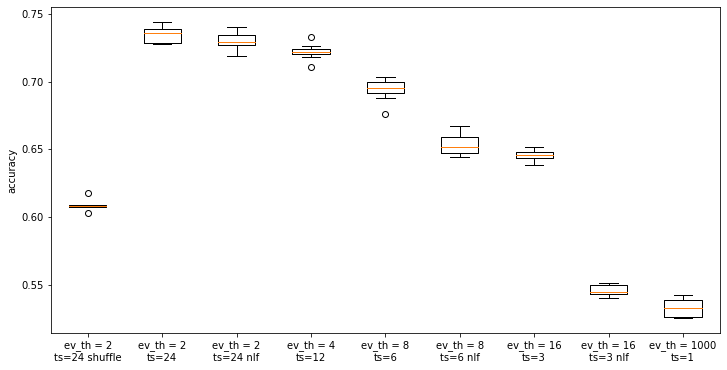

In [142]:
#100 epochs

val_accuracy_arr_100_1000_1 = [0.540, 0.531, 0.541, 0.525, 0.5272, 0.536, 0.526, 0.534, 0.525, 0.542]
val_accuracy_arr_100_16_3 = [0.644, 0.647, 0.6428, 0.648, 0.6513, 0.645, 0.648, 0.643, 0.638, 0.650]
val_accuracy_arr_100_8_6 = [0.700, 0.702, 0.688, 0.693, 0.700, 0.676, 0.695, 0.695, 0.691, 0.703]
val_accuracy_arr_100_2_24 = [0.743, 0.730, 0.728, 0.728, 0.739, 0.739, 0.733, 0.739, 0.728, 0.744]
val_accuracy_arr_100_4_12 = [0.718, 0.733, 0.720, 0.711, 0.726, 0.723, 0.722, 0.721, 0.724, 0.720]
val_accuracy_arr_100_2_24_shuffle = [0.609, 0.608, 0.603, 0.607, 0.618]

val_accuracy_arr_100_8_6_remove_last_fr = [0.647, 0.646, 0.667, 0.660, 0.660, 0.654, 0.648, 0.655, 0.650, 0.644]
val_accuracy_arr_100_2_24_remove_last_fr = [0.729, 0.727, 0.734, 0.734, 0.730, 0.726, 0.727, 0.719, 0.740, 0.739]
val_accuracy_arr_100_16_3_remove_last_fr = [0.551, 0.551, 0.544, 0.543, 0.540, 0.544, 0.545, 0.543, 0.550, 0.548]

data = [ val_accuracy_arr_100_2_24_shuffle, val_accuracy_arr_100_2_24, val_accuracy_arr_100_2_24_remove_last_fr, val_accuracy_arr_100_4_12, 
        val_accuracy_arr_100_8_6, val_accuracy_arr_100_8_6_remove_last_fr, 
        val_accuracy_arr_100_16_3, val_accuracy_arr_100_16_3_remove_last_fr, val_accuracy_arr_100_1000_1]
plt.figure(figsize=(12,6))
plt.boxplot(data, labels = ["ev_th = 2\nts=24 shuffle", "ev_th = 2\nts=24", "ev_th = 2\nts=24 nlf", "ev_th = 4\nts=12", "ev_th = 8\nts=6", "ev_th = 8\nts=6 nlf",
                            "ev_th = 16\nts=3", "ev_th = 16\nts=3 nlf",  "ev_th = 1000\nts=1"])
plt.ylabel("accuracy")

# plt.savefig('performance_vs_ev-th_100epochs.png')

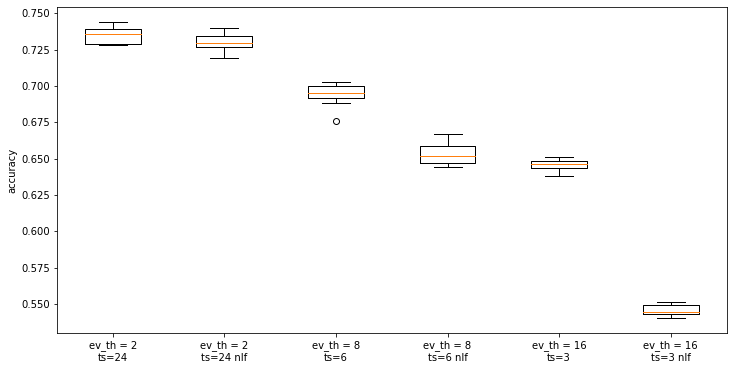

In [156]:
val_accuracy_arr_100_8_6 = [0.700, 0.702, 0.688, 0.693, 0.700, 0.676, 0.695, 0.695, 0.691, 0.703]
val_accuracy_arr_100_2_24 = [0.743, 0.730, 0.728, 0.728, 0.739, 0.739, 0.733, 0.739, 0.728, 0.744]
val_accuracy_arr_100_16_3 = [0.644, 0.647, 0.6428, 0.648, 0.6513, 0.645, 0.648, 0.643, 0.638, 0.650]

val_accuracy_arr_100_8_6_remove_last_fr = [0.647, 0.646, 0.667, 0.660, 0.660, 0.654, 0.648, 0.655, 0.650, 0.644]
val_accuracy_arr_100_2_24_remove_last_fr = [0.729, 0.727, 0.734, 0.734, 0.730, 0.726, 0.727, 0.719, 0.740, 0.739]
val_accuracy_arr_100_16_3_remove_last_fr = [0.551, 0.551, 0.544, 0.543, 0.540, 0.544, 0.545, 0.543, 0.550, 0.548]

data = [ val_accuracy_arr_100_2_24, val_accuracy_arr_100_2_24_remove_last_fr,
        val_accuracy_arr_100_8_6, val_accuracy_arr_100_8_6_remove_last_fr, 
        val_accuracy_arr_100_16_3, val_accuracy_arr_100_16_3_remove_last_fr]

plt.figure(figsize=(12,6))
plt.boxplot(data, labels = ["ev_th = 2\nts=24", "ev_th = 2\nts=24 nlf", "ev_th = 8\nts=6", "ev_th = 8\nts=6 nlf",
                            "ev_th = 16\nts=3", "ev_th = 16\nts=3 nlf"])
plt.ylabel("accuracy")

plt.savefig('performance_vs_ev-th_100epochs_w_wo_last_frame.png')

Text(0, 0.5, 'accuracy')

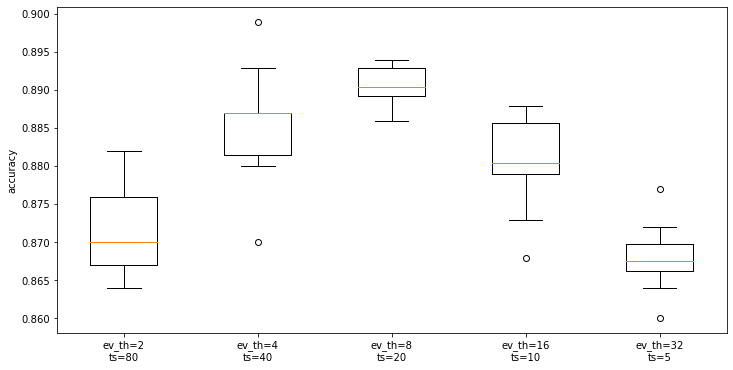

In [187]:
#50cm azel dataset
val_acc_100_32_5 = [0.866, 0.864, 0.868, 0.872, 0.860, 0.870, 0.869, 0.867, 0.877, 0.867]
val_acc_100_16_10 = [0.873, 0.881, 0.888, 0.886, 0.879, 0.885, 0.880,  0.887, 0.868, 0.879]
val_acc_250_10000_1 = [0.664, 0.669, 0.659, 0.653, 0.656, 0.663, 0.661, 0.661, 0.662, 0.663]
val_acc_100_8_20 = [0.890, 0.893, 0.890, 0.886, 0.888, 0.894, 0.893, 0.893, 0.889, 0.891]
val_acc_100_4_40 = [0.887, 0.881, 0.880, 0.870, 0.887, 0.893, 0.883, 0.887, 0.887, 0.899]
val_acc_100_2_80 = [0.882, 0.864, 0.870]

# data = [val_acc_100_8_20, val_acc_100_16_10, val_acc_100_32_5, val_acc_250_10000_1]
# lbls = ['ev_th=8\nts=20', 'ev_th=16\nts=10', 'ev_th=32\nts=5', 'ev_th=10000\nts=1 250e']

data = [val_acc_100_2_80, val_acc_100_4_40, val_acc_100_8_20, val_acc_100_16_10, val_acc_100_32_5]
lbls = ['ev_th=2\nts=80', 'ev_th=4\nts=40', 'ev_th=8\nts=20', 'ev_th=16\nts=10', 'ev_th=32\nts=5']

plt.figure(figsize=(12,6))
plt.boxplot(data, labels = lbls)
plt.ylabel("accuracy")

In [ ]:
pred102 = rnn102.predict(test_x_dvs[0])

# plt.figure(figsize=[4,1])
# plt.bar(['0', '1' , '2', '3', '4', '5', '6', '7', '8', '9'], height = pred102[110])

# plt.savefig('network_output.png')

In [ ]:
f_path='mnist_dvs/'

symbols_in_files= [[0, 5999], [6000, 11999], [12000, 17999], [18000, 23999], [24000, 29999]]
num_of_events = [[] for i in symbols_in_files]
for i, symbols in enumerate(symbols_in_files):
    
    f_name='mnist_'+str(symbols[0])+'_'+str(symbols[1])+'.pkl'
    full_path=f_path+f_name
    with open(full_path, 'rb') as f:
        events = pickle.load(f)
    
    for sym in events:
        num_of_events[i].append(len(sym))
        
    

In [ ]:
plt.figure()
# plt.hist([num_of_events[0], num_of_events[1], num_of_events[2]], density = True)
plt.hist(num_of_events[0], density = True)

#  plt.figure()
plt.hist(num_of_events[1], alpha=0.6, density=True)

# plt.figure()
plt.hist(num_of_events[2], alpha = 0.6, density=True)

plt.hist(num_of_events[3], alpha = 0.6, density=True)

plt.hist(num_of_events[4], alpha = 0.6, density=True)

In [ ]:
print(np.mean(num_of_events[0]), np.mean(num_of_events[1]), np.mean(num_of_events[2]))
print(np.std(num_of_events[0]), np.std(num_of_events[1]), np.std(num_of_events[2]))
# print(tf.__version__)

(array([[8.85935770e-06, 8.85935770e-06, 3.65448505e-04, 5.08748616e-03,
         1.30631229e-02, 1.03145072e-02, 3.45293466e-03, 8.23920266e-04,
         8.85935770e-05, 8.85935770e-06],
        [2.21483942e-06, 2.21483942e-05, 3.34440753e-03, 1.54219269e-02,
         1.22325581e-02, 2.14396456e-03, 5.53709856e-05, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00]]),
 array([  2. ,  32.1,  62.2,  92.3, 122.4, 152.5, 182.6, 212.7, 242.8,
        272.9, 303. ]),
 <a list of 2 BarContainer objects>)

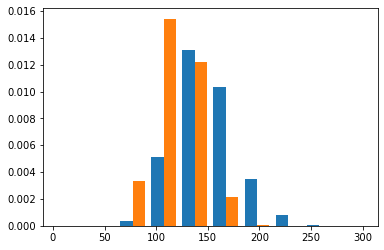

In [153]:
plt.figure()
# plt.hist([num_of_events[0], num_of_events[1], num_of_events[2]], density = True)
# plt.hist(list_eventsum[0:6000], density = True)

# list_eventsum_ = list_eventsum
# plt.hist(list_eventsum_, density = True)
plt.hist([list_eventsum[0:15000], list_eventsum[15000:30000]], density = True)
# list_eventsum[0]

In [ ]:
list_eventsum_zero = [i==0.0 for i in list_eventsum[24000:36000]]
all(list_eventsum_zero)

In [ ]:
models_path = 'models/'
model_name = 'mnist_dvs_keras_lowres_notraj'

rnn102.save(models_path+model_name+'.h5')

# Recreate the exact same model, including its weights and the optimizer
# new_model = tf.keras.models.load_model(models_path+model_name+'.h5')

# Show the model architecture
# new_model.summary()
rnn102.summary()

In [ ]:
mnist_img = x_train[36100, :, :]

plt.figure()
plt.imshow(mnist_img)
plt.savefig('mnist_fig_36100.png')

In [ ]:
import run_mnist_dvs_classifier
import importlib
importlib.reload(run_mnist_dvs_classifier)

run_mnist_dvs_classifier.main()


(array([6.000e+00, 1.100e+01, 6.220e+02, 3.485e+03, 5.792e+03, 3.529e+03,
        1.213e+03, 3.020e+02, 3.600e+01, 4.000e+00]),
 array([ 6., 13., 20., 27., 34., 41., 48., 55., 62., 69., 76.]),
 <BarContainer object of 10 artists>)

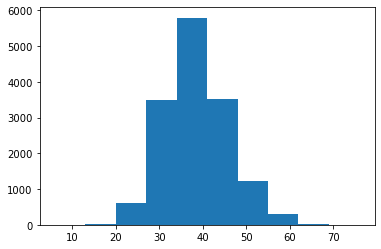

In [105]:
frames = []
for sample in list_np_fr[0]:
    frames.append(sample.shape[0])

# single_frame_indxs = (np.array(frames) == 1).nonzero()
# single_frame_indxs[0].shape
plt.figure()
plt.hist(frames)

In [ ]:
from matplotlib.animation import FuncAnimation
# plt.style.use('seaborn-pastel')

sample_pos = list_np_fr[1][0]
sample_neg = list_np_fr[2][0]

fig = plt.figure()
ax = plt.axes(xlim=(0, 15), ylim=(0, 15))
frame = np.zeros([16,16])
frame[0,0]=1
implt = ax.imshow(frame)

# def init():
#     implt.set_data(frame)
#     return [implt]
def animate(i):
#     frame[0,i]=1
#     implt.set_data(frame)
    implt.set_data(sample_pos[i,:,:]-sample_neg[i,:,:]  )
    return [implt]

# anim = FuncAnimation(fig, animate, init_func=init,
#                                frames=10, interval=200, blit=True)
anim = FuncAnimation(fig, animate, frames=sample_pos.shape[0], interval=100, blit=True)

# anim.save('test_anim.mp4', fps=10, extra_args=['-vcodec', 'libx264'])
anim.save('test_anim.gif', fps=10)
print('Done!')

# plt.show()

